## Gennaio 2016

In [14]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

### Esercizio 0
#### 0.1,0.2 Grafici
$D_X = {2,...,14}$, $X \sim Unif(D_X)$

$X \sim Geom(p)$, $n \in \{0,1,2,...\}$

### 0.3
$$E(X) = \frac{1-p}{p}$$

### 0.4
$$p = \frac{1}{E(X)+1}$$

### 0.5
$$Var(X) = \frac{1-p}{p^2} = E(X)(E(X)+1)$$

### Esercizio 1

In [10]:
df = pd.read_csv('Comune_Bergamo_-_Incidenti_stradali.csv')
df.columns

Index(['Protocollo', 'Anno', 'Data', 'Ora', 'Localita', 'NaturaIncidente',
       'N_Illesi', 'N_Feriti', 'N_Riservata', 'N_Morti', 'Pedoni',
       'Velocipedi', 'Ciclomotori_Motocicli', 'Mezzi_Pesanti',
       'Localizzazione'],
      dtype='object')

### 1.1

In [11]:
len(df)

28040

### 1.2
- Protocollo               categorici
- Anno                     ordinali
- Data                     ordinali
- Ora                      ordinali
- Localita                 categorici
- NaturaIncidente          categorici
- N_Illesi                 scalari
- N_Feriti                 scalari
- N_Riservata              28040 non-null int64
- N_Morti                  scalari
- Pedoni                   categorici
- Velocipedi               categorici
- Ciclomotori_Motocicli    categorici
- Mezzi_Pesanti            categorici
- Localizzazione           categorici

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28040 entries, 0 to 28039
Data columns (total 15 columns):
Protocollo               28040 non-null object
Anno                     28040 non-null int64
Data                     28040 non-null object
Ora                      28040 non-null object
Localita                 28040 non-null object
NaturaIncidente          28040 non-null object
N_Illesi                 28040 non-null int64
N_Feriti                 28040 non-null int64
N_Riservata              28040 non-null int64
N_Morti                  28040 non-null int64
Pedoni                   28040 non-null bool
Velocipedi               28040 non-null bool
Ciclomotori_Motocicli    28040 non-null bool
Mezzi_Pesanti            28040 non-null bool
Localizzazione           27954 non-null object
dtypes: bool(4), int64(5), object(6)
memory usage: 2.5+ MB


### 1.3
Modello Uniforme Anno intorno ai 2000

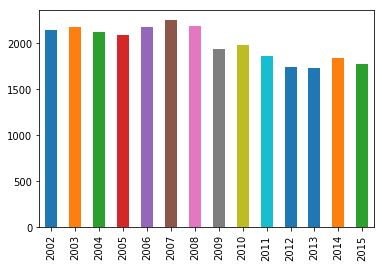

In [21]:
df['Anno'].value_counts(sort=False).plot.bar()
plt.show()

### 1.4

In [33]:
n_feriti = pd.crosstab(index=df['N_Feriti'],columns="Frequenza Relativa",colnames=[''],normalize=True)
n_feriti

,Frequenza Relativa
N_Feriti,
0,0.501676
1,0.398930
2,0.074750
3,0.016084
4,0.005528
5,0.001961
6,0.000571
7,0.000357
8,0.000071


### 1.5

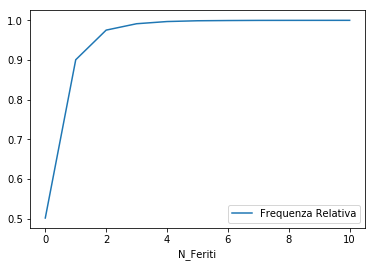

In [31]:
### incidenti, feriti ???
n_feriti.cumsum().plot()
plt.show()

### 1.6
!A = "nessuno ferito"

A = "almeno un ferito" = 1-P(!A)

In [43]:
1-df['N_Feriti'].value_counts(normalize=True).sort_index()[0]
#1-n_feriti[:1]

0.49832382310984313

### 1.7
valore atteso -> stimo con media campionaria

In [44]:
df['N_Feriti'].mean()

0.6357703281027104

### 1.8
Osservando il grafico e notando dai dati quì sotto che media e deviazione standard sono vicini possiamo assumere che il modello probabilistico è geometrico

In [45]:
df['N_Feriti'].describe()

count    28040.000000
mean         0.635770
std          0.790586
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: N_Feriti, dtype: float64

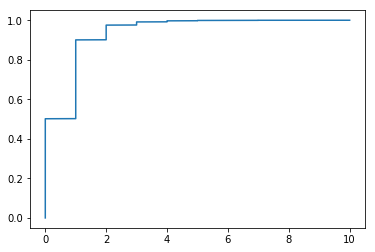

In [48]:
from statsmodels.distributions.empirical_distribution import ECDF
dist = ECDF(df['N_Feriti'].dropna())
plt.plot(dist.x, dist.y)
plt.show()

### 1.9
stima parametro della distribuzione

In [53]:
p = (1/(1+df['N_Feriti'].mean()))#vedi esercizio 0
p

0.6113327664769879

### 1.10

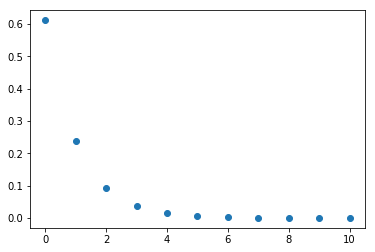

In [56]:
X = st.geom(p,loc=-1)
x = np.arange(11) #numero max di incidenti
plt.plot(x,X.pmf(x),'o')
plt.show()

### 1.11
diagramma dispesione N_Feriti e N_Illesi

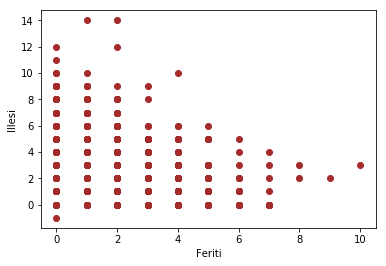

In [64]:
plt.scatter(df['N_Feriti'],df['N_Illesi'],color="brown")
plt.xlabel('Feriti')
plt.ylabel('Illesi')
plt.show()

### 1.12
Correlazione tra feriti e illesi

In [65]:
df['N_Feriti'].corr(df['N_Illesi'])

-0.3070519976103214

### Esercizio 2

Dati $X_1,...,X_n$ campione casuale, con X= numero illesi incidente
### 2.1 

Stimatore del valore atteso

$$T_n = \overline{X}$$

In [58]:
df['N_Illesi'].mean()

1.7973965763195434


### 2.2

$Var(\overline{X}) = \frac{1}{n} Var(X)$

$$\sigma(\overline{X}) = \sqrt{\frac{1}{n}Var(X)}$$

In [59]:
std = (df['N_Illesi'].var()/df['N_Illesi'].dropna().count())**0.5
std

0.007751809852772057


### 2.3
Dimostrare che $P(|Z| < k ) = 2\Phi(k)-1$

$$P(|Z|<k) = P(-k < Z < k) = \Phi(k) - \Phi(-k) = \Phi(k)-(1-\Phi(k)) = 2\Phi(k)-1$$

### 2.4
Determinare k tale che $P(|Z|<k) = 0.99$. Riprendo l'esercizio precedente 
$$2\Phi(k)-1 = 0.99$$

$$\Phi(k) = \frac{1.99}{2} = 0.995$$


$$k = \Phi^{-1}(0,955)$$

In [6]:
Z = st.norm()
Z.ppf(0.995)

2.5758293035489004

### 2.5
$$ P(|T_n - \mu| < \epsilon) = 0.99 $$

$$2\Phi(\frac{\epsilon\sqrt{n}}{\sigma}) - 1 = 0.99$$

$$P(|\overline{X}-E(\overline(X))|\leq 0.99) > \frac{Var(X)}{n*0.99}$$

$$ \epsilon = \frac{\phi^{-1}(0.995)\sigma}{\sqrt{n}} $$

In [60]:
(Z.ppf(0.995) * df['N_Illesi'].std())/df['N_Illesi'].dropna().count()**0.5

0.019967338974309353